# Visualizing the PCA transformation

## Principal Component Analysis

* Fundamental dimension reduction technique
* First step "decorrelation"
* Second step reduces dimension

### decorrelation

* rotates data samples to be aligned with axes.
* shifts data samples so they have mean 0
* No information is lost.

In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
wine = datasets.load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [3]:
X = wine['data']
y = wine['target']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (178, 13)
y shape: (178,)


In [4]:
print(wine['target_names'])

['class_0' 'class_1' 'class_2']


In [5]:
print(wine['feature_names'])

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [6]:
# PCA
model = PCA()
model.fit(X)

PCA()

In [7]:
transformed = model.transform(X)
print(transformed)

[[ 3.18562979e+02  2.14921307e+01  3.13073470e+00 ...  8.87340044e-02
  -3.85475626e-02  8.02644337e-02]
 [ 3.03097420e+02 -5.36471768e+00  6.82283550e+00 ...  3.97781862e-02
  -5.71915771e-02  1.35927465e-02]
 [ 4.38061133e+02 -6.53730945e+00 -1.11322298e+00 ...  2.37770027e-01
  -4.87978751e-02 -3.54081623e-02]
 ...
 [ 8.84580737e+01  1.87762846e+01 -2.23757651e+00 ... -2.23049341e-01
   9.60485020e-02  3.61748954e-02]
 [ 9.34562419e+01  1.86708191e+01 -1.78839152e+00 ... -3.04078323e-02
  -5.20893107e-02  1.32759078e-01]
 [-1.86943190e+02 -2.13330803e-01 -5.63050984e+00 ...  1.60725068e-01
   3.19201764e-02  2.69369989e-02]]


In [8]:
print(model.components_)

[[ 1.65926472e-03 -6.81015556e-04  1.94905742e-04 -4.67130058e-03
   1.78680075e-02  9.89829680e-04  1.56728830e-03 -1.23086662e-04
   6.00607792e-04  2.32714319e-03  1.71380037e-04  7.04931645e-04
   9.99822937e-01]
 [ 1.20340617e-03  2.15498184e-03  4.59369254e-03  2.64503930e-02
   9.99344186e-01  8.77962152e-04 -5.18507284e-05 -1.35447892e-03
   5.00440040e-03  1.51003530e-02 -7.62673115e-04 -3.49536431e-03
  -1.77738095e-02]
 [-1.68738094e-02 -1.22003373e-01 -5.19874304e-02 -9.38593003e-01
   2.97802484e-02  4.04846439e-02  8.54433387e-02 -1.35107797e-02
   2.46593824e-02 -2.91398464e-01  2.59776624e-02  7.03239693e-02
  -4.52868159e-03]
 [-1.41446778e-01 -1.60389543e-01  9.77280992e-03  3.30965260e-01
   5.39375605e-03  7.45846556e-02  1.69086724e-01 -1.08055610e-02
   5.01209524e-02 -8.78893693e-01  6.00349446e-02  1.78200254e-01
   3.11291570e-03]
 [ 2.03369773e-02 -6.12883454e-01  2.01755752e-02  6.43523403e-02
  -6.14934472e-03  3.15245063e-01  5.24761088e-01 -2.96475124e-02


In [9]:
mc = model.components_
mc_df = pd.DataFrame(mc,index=wine['feature_names'], columns= wine['feature_names'])
mc_df.head()

alcohol  malic_acid       ash  alcalinity_of_ash  \
alcohol            0.001659   -0.000681  0.000195          -0.004671   
malic_acid         0.001203    0.002155  0.004594           0.026450   
ash               -0.016874   -0.122003 -0.051987          -0.938593   
alcalinity_of_ash -0.141447   -0.160390  0.009773           0.330965   
magnesium          0.020337   -0.612883  0.020176           0.064352   

                   magnesium  total_phenols  flavanoids  nonflavanoid_phenols  \
alcohol             0.017868       0.000990    0.001567             -0.000123   
malic_acid          0.999344       0.000878   -0.000052             -0.001354   
ash                 0.029780       0.040485    0.085443             -0.013511   
alcalinity_of_ash   0.005394       0.074585    0.169087             -0.010806   
magnesium          -0.006149       0.315245    0.524761             -0.029648   

                   proanthocyanins  color_intensity       hue  \
alcohol                   0.000601         0.002327  0.000171   
malic_acid                0.005004         0.015100 -0.000763   
ash                       0.024659        -0.291398  0.025978   
alcalinity_of_ash         0.050121        -0.878894  0.060035   
magnesium                 0.251183         0.331747  0.051524   

                   od280/od315_of_diluted_wines   proline  
alcohol                                0.000705  0.999823  
malic_acid                            -0.003495 -0.017774  
ash                                    0.070324 -0.004529  
alcalinity_of_ash                      0.178200  0.003113  
magnesium                              0.260639 -0.002299

In [10]:
var = model.explained_variance_
var_ratio = model.explained_variance_ratio_

In [11]:
var

array([9.92017895e+04, 1.72535266e+02, 9.43811370e+00, 4.99117861e+00,
       1.22884523e+00, 8.41063869e-01, 2.78973523e-01, 1.51381266e-01,
       1.12096765e-01, 7.17026032e-02, 3.75759789e-02, 2.10723661e-02,
       8.20370314e-03])

In [12]:
var_ratio

array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05,
       1.23636847e-05, 8.46213034e-06, 2.80681456e-06, 1.52308053e-06,
       1.12783044e-06, 7.21415811e-07, 3.78060267e-07, 2.12013755e-07,
       8.25392788e-08])

In [13]:
var_ratio = model.explained_variance_ratio_
data = dict(zip(wine['feature_names'], zip(var, var_ratio * 100)))
df_var = pd.DataFrame(data, index=['var', 'var_ratio'])
df_var

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
var        99201.789517  172.535266  9.438114           4.991179   1.228845   
var_ratio     99.809123    0.173592  0.009496           0.005022   0.001236   

           total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
var             0.841064    0.278974              0.151381         0.112097   
var_ratio       0.000846    0.000281              0.000152         0.000113   

           color_intensity       hue  od280/od315_of_diluted_wines   proline  
var               0.071703  0.037576                      0.021072  0.008204  
var_ratio         0.000072  0.000038                      0.000021  0.000008

In [14]:
model.singular_values_

array([4.19031225e+03, 1.74753375e+02, 4.08723149e+01, 2.97226953e+01,
       1.47480712e+01, 1.22011600e+01, 7.02697044e+00, 5.17633888e+00,
       4.45433804e+00, 3.56249362e+00, 2.57894324e+00, 1.93127129e+00,
       1.20501264e+00])

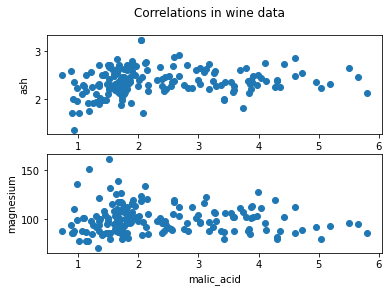

In [34]:
malic_acid = wine['data'][:, 1]
ash = wine['data'][:, 2]
magnesium = wine['data'][:, 4]

fig, axs = plt.subplots(2, 1)
fig.suptitle("Correlations in wine data")
axs[0].scatter(malic_acid, ash)
axs[0].set(xlabel='malic_acid', ylabel='ash')
axs[1].scatter(malic_acid, magnesium)
axs[1].set(xlabel='malic_acid', ylabel='magnesium')
plt.show()

In [32]:
corr, pval = pearsonr(malic_acid, ash)
print(f"corr: {corr}\npval: {pval}")

corr: 0.16404546975674442
pval: 0.028664872727911437


In [33]:
corr, pval = pearsonr(magnesium, ash)
print(f"corr: {corr}\npval: {pval}")

corr: 0.2865866912581744
pval: 0.00010520068013946938


## Intrinsic dimension

* Intrinsic dimension is number of PCA features with significant variance.

In [35]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [49]:
# versicolor data
versicolor = np.where(iris.target == 1)
versicolor

(array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
        67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
        84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),)

In [50]:
iris_versi = iris['data'][versicolor]
model = PCA()
model.fit(iris_versi)

PCA()

In [53]:
model.n_components_

4

In [54]:
iris_pca_var = model.explained_variance_
iris_pca_var

array([0.48787394, 0.0723841 , 0.05477609, 0.00979036])

In [39]:
iris_features = iris['feature_names']
iris_features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

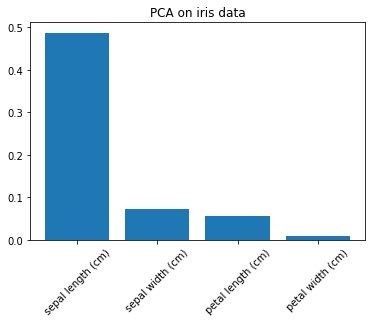

In [55]:
plt.bar(iris_features, iris_pca_var)
plt.xticks(rotation=45)
plt.title("PCA on iris data")
plt.show()

In iris (versicolor) datasets: the first two PCA features (sepal length & sepal width)

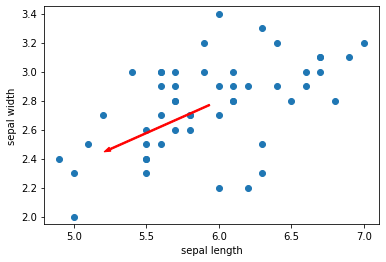

In [57]:
plt.scatter(iris_versi[..., 0], iris_versi[..., 1])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
mean = model.mean_
first_pc = model.components_[0,:]
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='r', width=0.01)
plt.axis('equal')
plt.show()

This is the direction in which the data varies the most

In [60]:
fish = pd.read_csv("../datasets/unsupervised_learning/fish.csv", header=None)
fish.head()

0      1     2     3     4     5     6
0  Bream  242.0  23.2  25.4  30.0  38.4  13.4
1  Bream  290.0  24.0  26.3  31.2  40.0  13.8
2  Bream  340.0  23.9  26.5  31.1  39.8  15.1
3  Bream  363.0  26.3  29.0  33.5  38.0  13.3
4  Bream  430.0  26.5  29.0  34.0  36.6  15.1

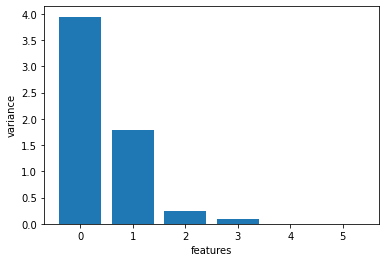

In [66]:
Xfish = fish.iloc[:, 1:]
scaler = StandardScaler()
pca = PCA()

pipeline = make_pipeline(scaler, pca)
pipeline.fit(Xfish)
features = range(pca.n_components_)

fig, ax = plt.subplots()
ax.bar(features, pca.explained_variance_)
ax.set(xlabel='features', ylabel='variance')
plt.show()

### tf-idf

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

In [72]:
tfidf = TfidfVectorizer()
csr_mat = tfidf.fit_transform(documents)
print(csr_mat.toarray())

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]


In [73]:
# column of the array corresponds to words.
words = tfidf.get_feature_names()
print(words)

['cats', 'chase', 'dogs', 'meow', 'say', 'woof']
